Greetings. My name is Aniruddha Chiplunkar. I am an aspiring ML Engineer from UC Davis, and I will take an honest crack at this Kaggle Competition.

In [2]:
import pandas as pd 
import numpy as np

# Load Data

In [3]:
df_train = pd.read_csv("/Users/r3alistic/Programming/MLProficiency/HandsOnMLBook/spaceship-titanic/train.csv")

Play around with the data 

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Off the top, I can see that the spendings vary in Room Service, Food Court, Shopping Mall, Spa, and VR Deck. I can create a boof variable of **mean amount spent** later to see if that makes a better correlation or not

In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

This probably means that the test set has missing values too. That kind of sucks. 

In [7]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

The VIP column can become Boolean. But it's okay. We can OneHotEncode with the rest

In [8]:
categorical = ["HomePlanet","CryoSleep","Cabin","Destination","VIP"]
quantitative = ["RoomService","FoodCourt","Age","ShoppingMall","Spa","VRDeck"]
#Name and PassengerId are kind of irrelevant in terms of prediction ngl

In [9]:
df_test = pd.read_csv("/Users/r3alistic/Programming/MLProficiency/HandsOnMLBook/spaceship-titanic/test.csv")

In [10]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Just as I suspected, it also has missing values. It will have to be cleaned and fitted in a similar way. 

# EDA

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

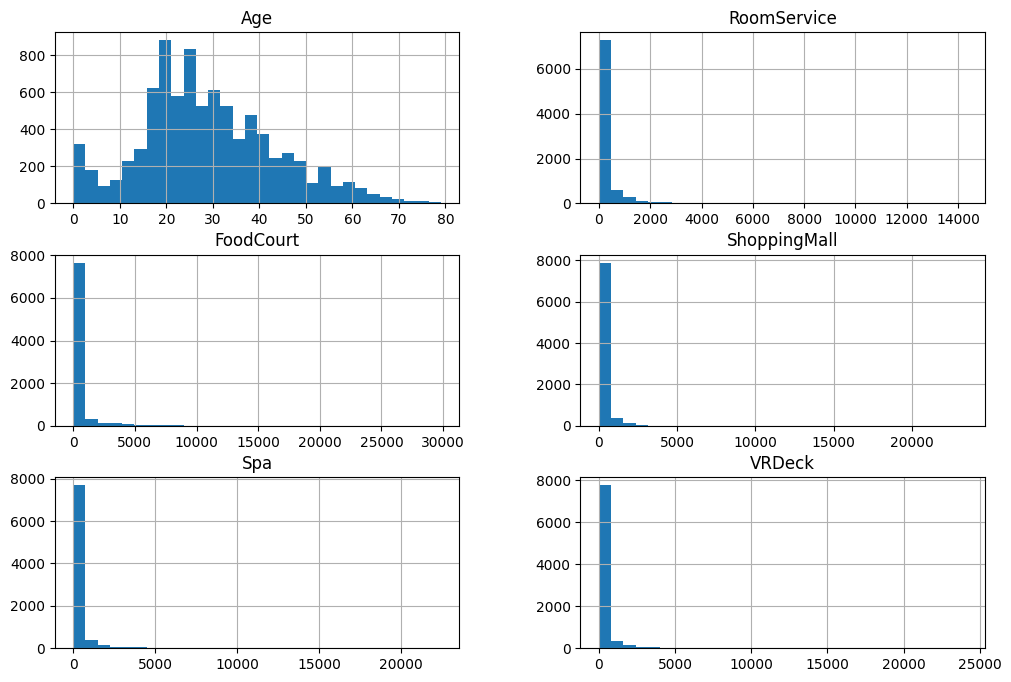

In [11]:
df_train.hist(bins=30,figsize=(12,8))

When it came to the ammenties, most people spent little to no money. 

Let's re try our visualizations after cleaning

# Data Pre Processing

## Transforming Data To Clean

Column Transformer --> Pipeline (transformer,initial model) --> Initial eval

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The quantitative variables need to be scaled and imputed, so we need a pipeline in the pipeline

In [13]:
sub_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

In [14]:
preprocessing = ColumnTransformer([
    ("categorical",OneHotEncoder(handle_unknown='ignore'),categorical),
    ("quantitative",sub_pipeline,quantitative)
],
remainder='passthrough'
)

In [15]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pipeline_logReg= Pipeline([
    ("preprocessor",preprocessing),
    ("classifier",LogisticRegression())
])

Learned something new: The pipeline I have is doing preprocessing and Log regression in that order. I just need to do .fit on my training data, and it will know what to transform. But what about all the missing and unscaled values in the test data? That's easy. When I do pipeline_ridge.predict(X_test), it will know what to do then too. Good stuff 

# Train Test Split

It was already done for me by the competition makers

# Model Training

First we need to make X and y

See our y variable is already boolean, and that works. Sklearn knows to treat 1 and 0, but let's just convert it to be safe. 

In [17]:
X_train = df_train.drop(columns=["Transported","PassengerId","Name"])
y_train = df_train["Transported"].astype(int).to_numpy()

Note for later: maybe it would be good if we shuffled these

In [18]:
pipeline_logReg.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP']),
                                                 ('quantitative',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'Age', 'ShoppingMall', 'Spa',
                                                   'VRDeck'])])),
                ('logisticRegression', LogisticRegression())])

Evaluate on the train set to see how the model generalizes

In [19]:
y_pred_train = pipeline_logReg.predict(X_train)

Let's focus on accuracy score and confusion matrix because that is what the competition is looking for

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_train,y_pred_train)

0.8575865639019901

From here on, let's try two more diff classification models before we do grid search. 

Let us give Ridge Classifier a try 

In [22]:
from sklearn.linear_model import RidgeClassifier

In [42]:
pipeline_ridgeClass = Pipeline([
    ("preprocessor",preprocessing),
    ("classifier",RidgeClassifier(random_state=42))
])

In [43]:
pipeline_ridgeClass.fit(X_train,y_train)
y_pred_train2 = pipeline_ridgeClass.predict(X_train)
accuracy_score(y_train,y_pred_train2)

0.9624985620614287

Now that is pretty nice, but only training accuracy

Let us try random forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
pipeline_randomForest = Pipeline([
    ("preprocessor",preprocessing),
    ("classifier",RandomForestClassifier())
])

the criterion parameter tells us the threshold to give the most useful split. IT basically handles the split and which direction down the tree to go. 

In [37]:
pipeline_randomForest.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP']),
                                                 ('quantitative',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'Age', 'ShoppingMall', 'Spa',
                                                   'VRDeck'])])),
                ('classifier', RandomForestClassifier())])

In [38]:
y_pred_train3 = pipeline_randomForest.predict(X_train)

In [39]:
accuracy_score(y_train,y_pred_train3)

0.9996548947428966

I think that is as good as we can get for a training accuracy. But that won't mean much until we really make sure it generalizes well on new data. 

So that is why we regularize and tune hyperparameters. It's going to get really bad if we do not. Random Forest is really prone to overfitting

I think it is best to tune all three cuz why tf not

# Model Training - Hyperparameter Tuning + Regularization

In [33]:
from sklearn.model_selection import RandomizedSearchCV

Let's start with tuning our "best trained model" - Random Forest

cv=3 is standard. But n_jobs = -1 will make it faster, but use CPU power

In [ ]:
#Don't run this. It was a valuable lesson

# param_dict = {
#     "n_estimators": [100, 200, 500],                 # Number of trees
#     "max_depth": [None, 10, 20, 30],                 # How deep each tree can go
#     "min_samples_split": [2, 5, 10],                 # Minimum samples to split a node
#     "min_samples_leaf": [1, 2, 4],                   # Minimum samples in a leaf node
#     "max_features": ["sqrt", "log2"],                # Number of features to consider at each split
#     "bootstrap": [True, False],                      # Whether to use bootstrap sampling
#     "criterion": ["gini", "log_loss"]                # Splitting criteria (log_loss is great for prob. output)
# }


# randSearch = RandomizedSearchCV(pipeline_randomForest,param_distributions = param_dict,cv=3,n_jobs=-1)

I learned something new today:

basically what I am trying to do is use the whole pipeline as an estimator, which is common. However, everything in my pipeline does not have n_estimators and max_depth. So I need to **specify** that those keys in the dictionary are about the classifier, and not the preprocessor

<span style="color:lightblue">So it is a good thing that I use Pipeline and not make_pipeline, and it is good that I am naming it as classifier</span>

In [46]:
param_dict = {
    "classifier__n_estimators": [100, 200, 500],                 # Number of trees
    "classifier__max_depth": [None, 10, 20, 30],                 # How deep each tree can go
    "classifier__min_samples_split": [2, 5, 10],                 # Minimum samples to split a node
    "classifier__min_samples_leaf": [1, 2, 4],                   # Minimum samples in a leaf node
    "classifier__max_features": ["sqrt", "log2"],                # Number of features to consider at each split
    "classifier__bootstrap": [True, False],                      # Whether to use bootstrap sampling
    "classifier__criterion": ["gini", "log_loss"]                # Splitting criteria (log_loss is great for prob. output)
}


randSearch = RandomizedSearchCV(pipeline_randomForest,param_distributions = param_dict,cv=3,n_jobs=-1)

In [47]:
randSearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['HomePlanet',
                                                                                'CryoSleep',
                                                                                'Cabin',
                                                                                'Destination',
                                                                                'VIP']),
                                                                              ('quantitative',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['RoomService',
                                                                                'FoodCourt',
                                                                                '...
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__criterion': ['gini',
                                                                  'log_loss'],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     500]})

Oh wow that worked. Now one last time on the training set before deploying

In [48]:
y_pred_rcv_train = randSearch.predict(X_train)

In [49]:
accuracy_score(y_train,y_pred_rcv_train)

0.9973541930288738

Good stuff

# Model Deployment 

Here is the catch: df_test is absolutely cooked. It's really bad. It is completely unprocessed, but if the RSCV has a pipeline as its estimator, I trust it will do the right thing

In [50]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [51]:
X_test = df_test.drop(columns=["PassengerId","Name"])

In [ ]:
final_model = randSearch.best_estimator_
y_pred_final = final_model.predict(X_test)

We really do not have a y_test because that is from the Kaggle competition. For now, let's save our final model to joblib

Things to do in next session: save to joblib, upload submission to competiton